# Explorando um dataset 
#### (Capítulo 3: Análise Exploratória de Dados para Séries Temporais)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import catppuccin
mpl.style.use(catppuccin.PALETTE.mocha.identifier)

# link dos dados (originalmente disponiveis no R)
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/EuStockMarkets.csv"

# carregar os dados no DataFrame
df = pd.read_csv(url)
df.drop(columns=['rownames'], inplace=True)

df.head()

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7


<Axes: title={'center': 'EuStockMarkets Dataset Variables'}>

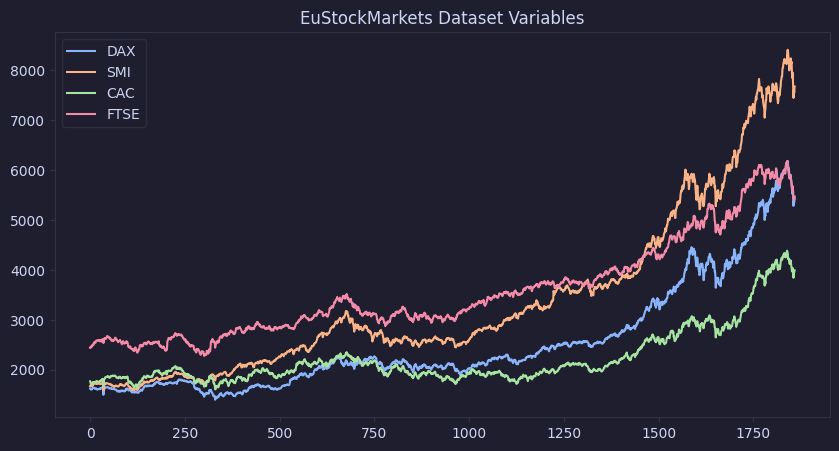

In [32]:
df.plot(figsize=(10, 5), 
        title='EuStockMarkets Dataset Variables')

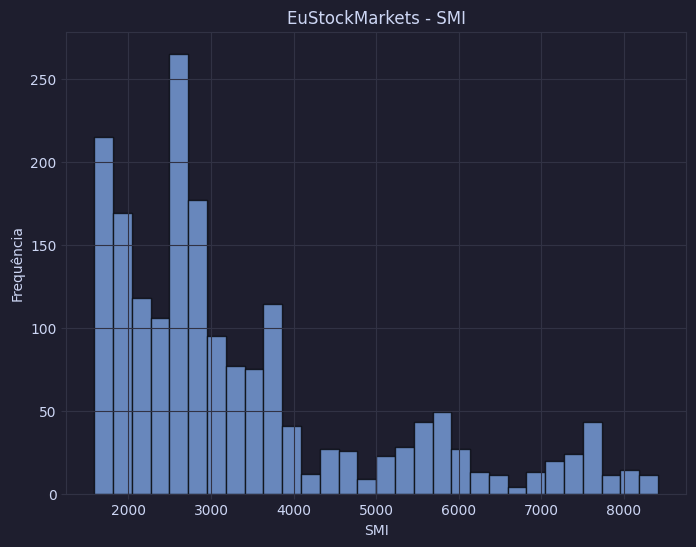

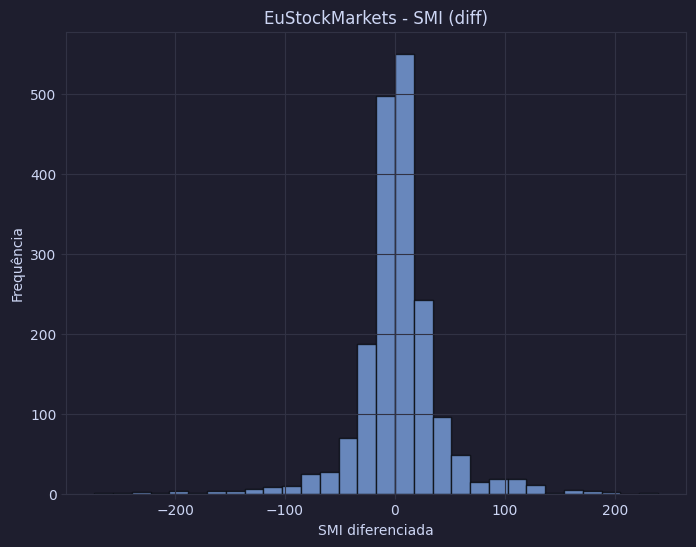

In [33]:
# Plotar o histograma da variável SMI
plt.figure(figsize=(8, 6))
plt.hist(df['SMI'], bins=30, alpha=0.7, edgecolor='black')
plt.title('EuStockMarkets - SMI')
plt.xlabel('SMI')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Calcular a diferenciação da variável SMI
df['SMI_diff'] = df['SMI'].diff().dropna()

# Plotar o histograma da variável SMI diferenciada
plt.figure(figsize=(8, 6))
plt.hist(df['SMI_diff'].dropna(), bins=30, alpha=0.7, edgecolor='black')
plt.title('EuStockMarkets - SMI (diff)')
plt.xlabel('SMI diferenciada')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

O histograma dos dados não transformados é amplo e não mostra uma distribuição normal devido à tendência nos dados. Em séries temporais financeiras, a diferenciação dos dados é mais útil, pois foca nas mudanças de valor entre medições consecutivas. Isso torna o histograma dos dados diferenciados mais informativo do que o dos dados com tendência.

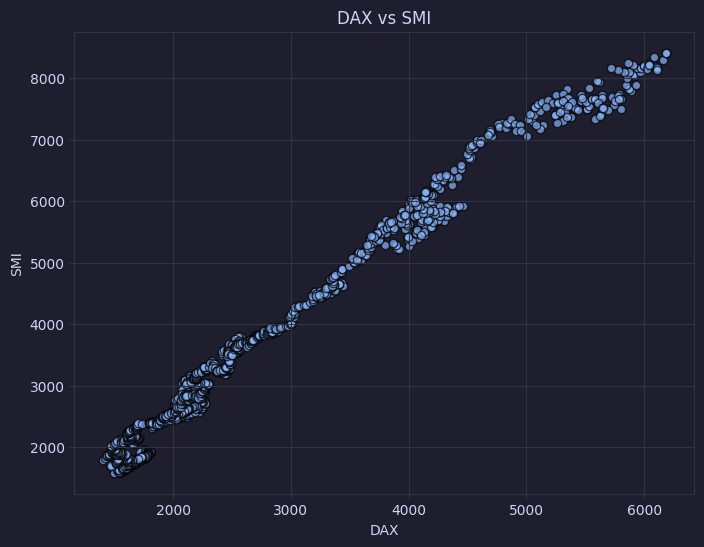

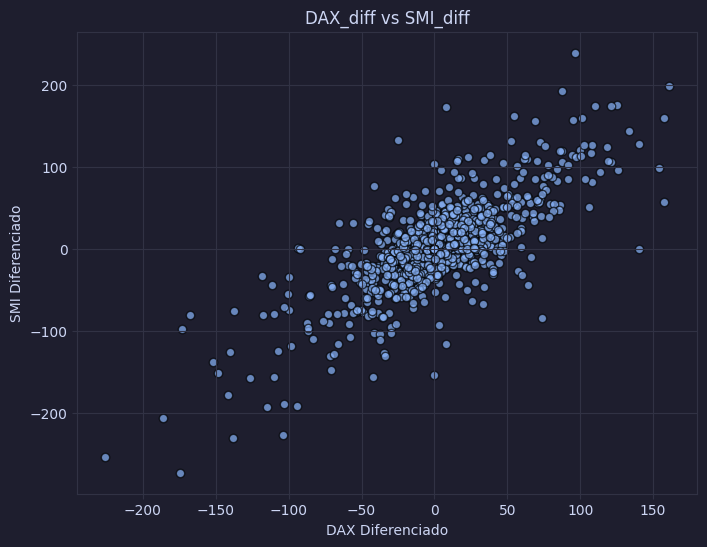

In [34]:
# Gráfico de dispersão para os dados não transformados
plt.figure(figsize=(8, 6))
plt.scatter(df['DAX'], df['SMI'], alpha=0.7, edgecolor='black')
plt.title('DAX vs SMI')
plt.xlabel('DAX')
plt.ylabel('SMI')
plt.grid(True)
plt.show()

# Calcular a diferenciação das variáveis DAX e SMI
df['DAX_diff'] = df['DAX'].diff().dropna()
df['SMI_diff'] = df['SMI'].diff().dropna()

# Gráfico de dispersão para os dados diferenciados
plt.figure(figsize=(8, 6))
plt.scatter(df['DAX_diff'], df['SMI_diff'], alpha=0.7, edgecolor='black')
plt.title('DAX_diff vs SMI_diff')
plt.xlabel('DAX Diferenciado')
plt.ylabel('SMI Diferenciado')
plt.grid(True)
plt.show()

As supostas correlações nas figuras acima são interessantes, mas, ainda que sejam correlações verdadeiras (e há motivos para duvidar que sejam), elas não são correlações que podemos monetizar como traders atuantes. Quando uma ação está em alta ou em queda, as outras ações com as quais ela está correlacionada também estarão, visto que estamos fazendo correlações de valores em pontos de tempo idênticos. O que precisamos fazer é descobrir se a mudança anterior no tempo de uma ação pode predizer a mudança posterior no tempo de outra ação. Para tal, recuamos uma das diferenças das ações em 1 antes de analisarmos o gráfico de dispersão.

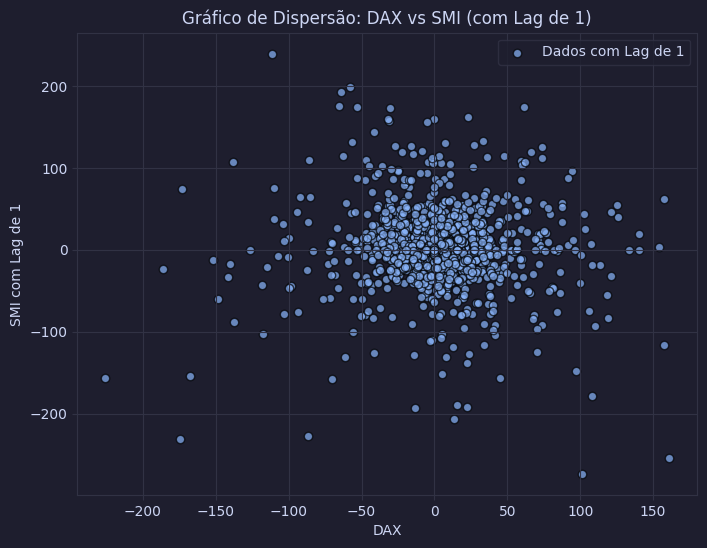

In [35]:
# Adicionar a coluna com o lag de 1 em 'SMI'
df['SMI_lag1'] = df['SMI_diff'].shift(1)

# Remover linhas com NaN (que foram criadas pelo shift)
df = df.dropna()

# Plotar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df['DAX_diff'], df['SMI_lag1'], alpha=0.7, edgecolor='black', label='Dados com Lag de 1')
plt.title('Gráfico de Dispersão: DAX (diff) vs SMI (diff com Lag de 1)')
plt.xlabel('DAX')
plt.ylabel('SMI com Lag de 1')
plt.grid(True)
plt.legend()
plt.show()

A correlação entre as ações desaparece assim que inserimos um lag de tempo, indicando que SMI (índice de bolsa de valores suíço) não parece predizer o DAX (índice de ações alemão)